<a href="https://colab.research.google.com/github/saanvi2725/SCT_DS_4/blob/main/SCT_DS_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Setup

In [1]:
import kagglehub
path = kagglehub.dataset_download("sobhanmoosavi/us-accidents")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/us-accidents


Load and Explore the Dataset

In [5]:
import pandas as pd
df = pd.read_csv('US_Accidents.csv')
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Start_Time         100 non-null    object 
 1   Severity           100 non-null    int64  
 2   Weather_Condition  100 non-null    object 
 3   Visibility(mi)     100 non-null    int64  
 4   Start_Lat          100 non-null    float64
 5   Start_Lng          100 non-null    float64
 6   City               100 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


,Severity,Visibility(mi),Start_Lat,Start_Lng
count,100.000000,100.000000,100.000000,100.000000
mean,2.400000,5.200000,34.545000,-117.745000
std,1.024941,3.327267,0.290115,0.290115
min,1.000000,1.000000,34.050000,-118.240000
25%,2.000000,2.000000,34.297500,-117.992500
50%,2.000000,6.000000,34.545000,-117.745000
75%,3.000000,7.000000,34.792500,-117.497500
max,4.000000,10.000000,35.040000,-117.250000


In [6]:
df.isnull().sum()


,0
Start_Time,0
Severity,0
Weather_Condition,0
Visibility(mi),0
Start_Lat,0
Start_Lng,0
City,0


Now clean the Data

In [8]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.day_name()


Now let's analyze patterns

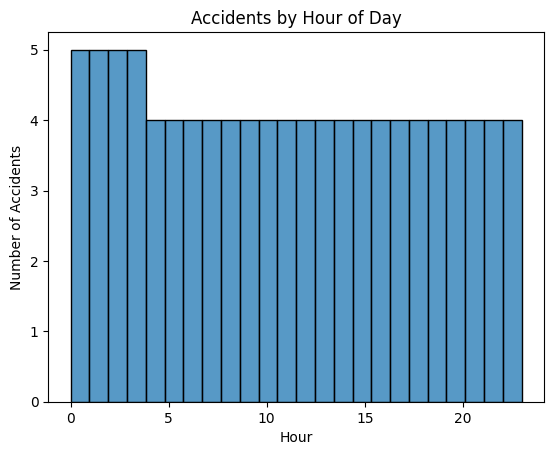

In [9]:
#by time
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['Hour'], bins=24)
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show()


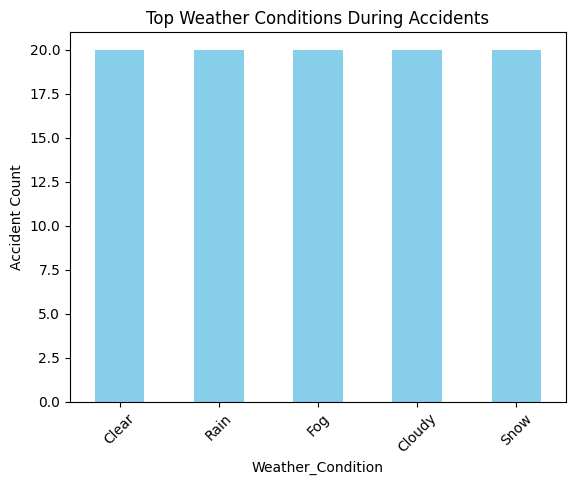

In [10]:
#by weather
top_weather = df['Weather_Condition'].value_counts().head(10)
top_weather.plot(kind='bar', color='skyblue')
plt.title('Top Weather Conditions During Accidents')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.show()


Hotspot Visualization

In [21]:
import folium
from folium.plugins import HeatMap
# Sample a number of rows less than or equal to the size of the DataFrame after dropna()
num_samples = min(1000, len(df[['Start_Lat', 'Start_Lng']].dropna()))
heat_df = df[['Start_Lat', 'Start_Lng']].dropna().sample(num_samples)
m = folium.Map(location=[39.5, -98.35], zoom_start=5)
HeatMap(data=heat_df.values, radius=8).add_to(m)
m


In [22]:
plt.savefig('accidents_by_hour.png')


<Figure size 640x480 with 0 Axes>